# Dataset 

you can get this data from UCL Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
data=pd.read_csv(r"C:\Users\kolli\Downloads\Datasets\concrete_data.csv")

In [3]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Exploratory Data Analysis

<font color='317455'>In EDA we take a look at the data and understand the variables. <br>
<font color='blue'>Now we walkover the data inorder to understand it better and find if there are any useful patterns which we can identify or any outliers and missing values. we also look into correlation matrix to identify if there is any multicollinearity

In [4]:
print("The shape of the Dataset is:",data.shape)

The shape of the Dataset is: (1030, 9)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<font color='blue'> Lets have a look about the data using .describe() method to see the mean,standard deviation and other information.  

In [8]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<font color='blue'> Sweetviz is an open source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with a single line of code. 
<font color='green'> we can also compare two dataframes using Sweetviz...!!

In [4]:
import sweetviz as sv

my_report = sv.analyze(data)

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [9]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


<b>Finding Correlation </b>

<font color='blue'>Here i have written a function that drops the Null values and replace it with NaN. 
<br> i have used a pearson coefficient and it shows if there any columns with correlation > 85. we are gonna drop these because of Multicollinearity.

The Columns with correlation >0.85 are : []
The Remaining columns after dropping correlated columns are: ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']


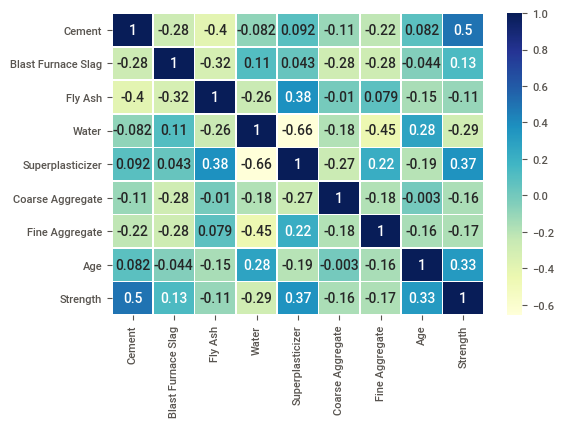

In [14]:
def corr(data):
    data=data.dropna(how='any')                  # to drop null values
    data=data.replace(np.nan, 'NaN', regex=True) #to replace Null values with NaN
    crln =data.corr(method='pearson')            #applying pearson correlation
    upper = crln.where(np.triu(np.ones(crln.shape),k=1).astype(np.bool)) 
    to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]  #Dropping columns with correlation >0.85
    df1 = data.drop(to_drop,axis=1)
    print("The Columns with correlation >0.85 are :",to_drop)
    print("The Remaining columns after dropping correlated columns are:",list(df1))
    sb.heatmap(crln, xticklabels=crln.columns,yticklabels=crln.columns,cmap='YlGnBu',annot=True,linewidth=0.5)   
corr(data)

<font color='blue'>we can clearly see that there are no multi correlated variables .
   <br> Let us have look on the Distributions of Data Variables

<AxesSubplot:xlabel='Strength'>

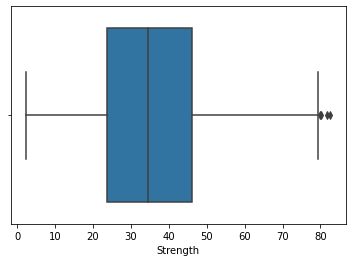

In [27]:
import seaborn as sns
sns.boxplot(x=data['Strength'])

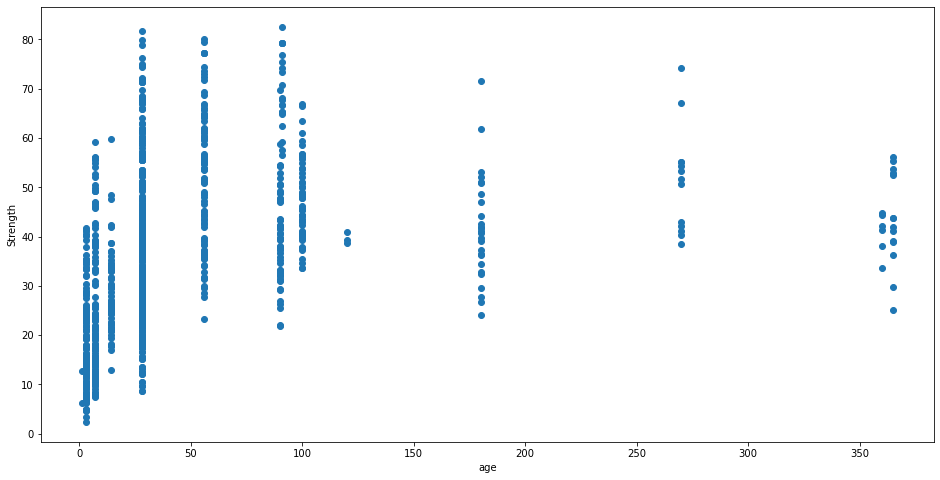

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Age'] , data['Strength'])
ax.set_xlabel('age')
ax.set_ylabel('Strength')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Strength'>

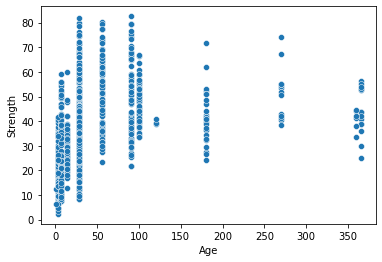

In [48]:
sns.scatterplot('Age','Strength', data=data)

<AxesSubplot:xlabel='Cement', ylabel='Strength'>

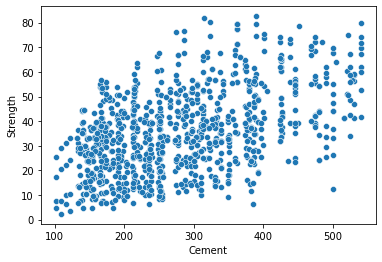

In [51]:
sns.scatterplot(x='Cement',y='Strength', data=data)

<font color='blue'> it is observed that increase in cement quantity also increase in strength.

C:\Users\kolli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


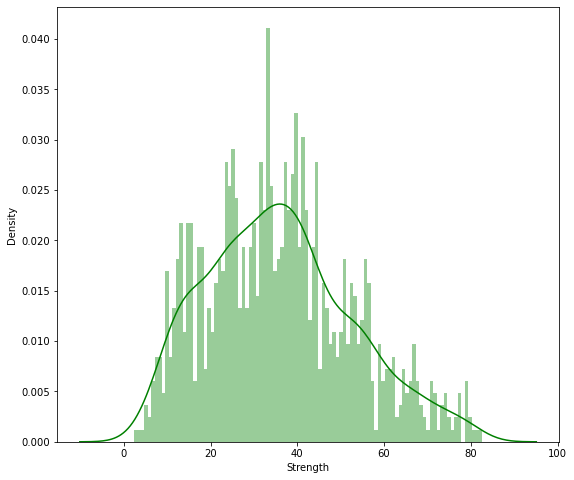

In [54]:
plt.figure(figsize=(9, 8))
sns.distplot(data['Strength'], color='g', bins=100, hist_kws={'alpha': 0.4});

<h2> Numerical Data Distribution </h2>
    <br> For this part lets look at the distribution of all of the features by ploting them

<br>To do so lets first list all the types of our data from our dataset and take only the numerical ones:

array([[<AxesSubplot:title={'center':'Cement'}>,
        <AxesSubplot:title={'center':'Blast Furnace Slag'}>,
        <AxesSubplot:title={'center':'Fly Ash'}>],
       [<AxesSubplot:title={'center':'Water'}>,
        <AxesSubplot:title={'center':'Superplasticizer'}>,
        <AxesSubplot:title={'center':'Coarse Aggregate'}>],
       [<AxesSubplot:title={'center':'Fine Aggregate'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Strength'}>]], dtype=object)

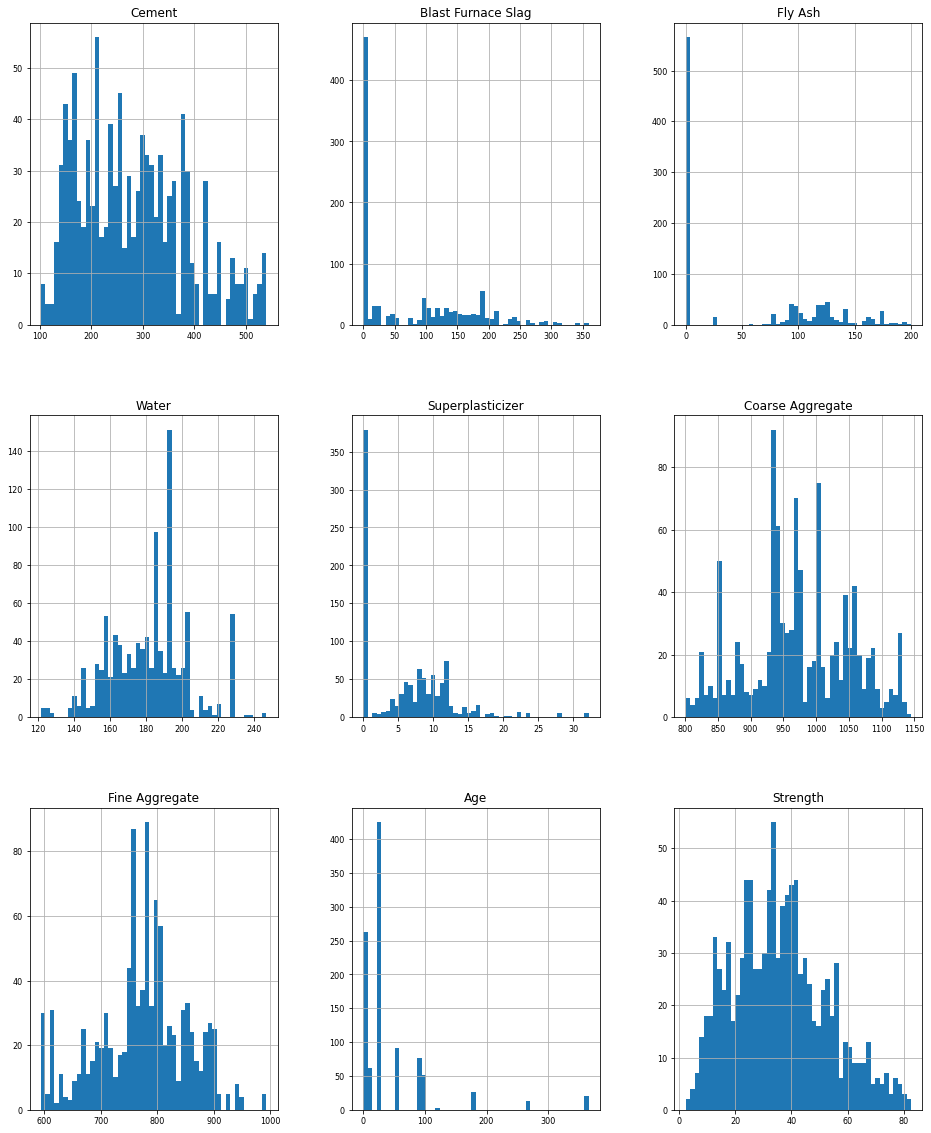

In [59]:
plots = data.select_dtypes(include = ['float64', 'int64'])
plots.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

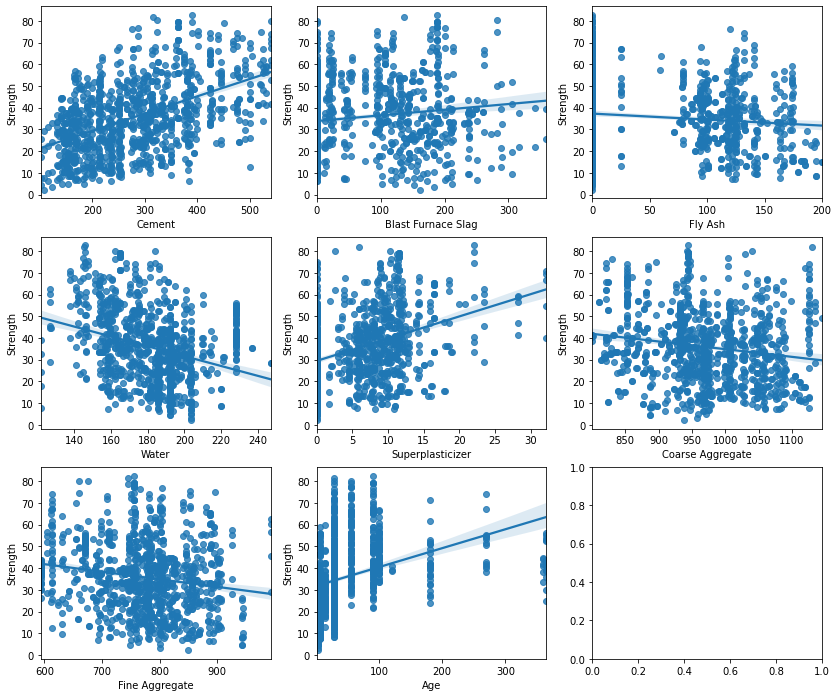

In [75]:
df=list(data)
fig, ax = plt.subplots(round(len(df) / 3), 3, figsize = (14, 12))
for i, ax in enumerate(fig.axes):
    if i < len(df) - 1:
        sns.regplot(x=df[i],y='Strength', data=data[df], ax=ax)

<b>Data Scaling</b>
<br>In this the data will be scaled in the range 0 to 1 using sklearn 

In [18]:
X = data.iloc[1:, :-1].values
y = data.iloc[1:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
regressor.intercept_

35.55869444444439

In [21]:
regressor.coef_

array([13.07061719,  9.29612788,  6.07754028, -2.38797659,  2.13444427,
        1.74782814,  1.75752107,  7.36636378])

In [22]:
y_pred = regressor.predict(X_test)

In [77]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,26.06,40.561780
1,74.36,55.321785
2,56.50,63.256474
3,38.61,47.683153
4,12.54,18.035352


In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.582629611232942
Mean Squared Error: 123.35085410285603
Root Mean Squared Error: 11.106342967100199


# Regression using Auto ML Tools ( PyCaret)

<font color='blue'> PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment. it increases the productivity and easy to use.

In [101]:
from pycaret.regression import *

In [103]:
exp_reg101 = setup(data = data, target = 'Strength',numeric_features=['Age'],normalize=True,remove_outliers=True,remove_multicollinearity=True, session_id=123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1030, 9)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 0
INFO:logs:setup() succesfully completed......................................


In [104]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,2.9172,20.5517,4.3934,0.9267,0.1311,0.0987,2.2433
1,Extreme Gradient Boosting,3.1478,24.4444,4.7707,0.9135,0.1467,0.1087,0.1340
2,Light Gradient Boosting Machine,3.3236,25.1144,4.8429,0.9107,0.1505,0.1138,0.1185
3,Extra Trees Regressor,3.3424,27.2465,5.1128,0.9031,0.1519,0.1142,0.2782
4,Random Forest,3.8881,30.9319,5.4178,0.8909,0.1709,0.1374,0.3338
5,Gradient Boosting Regressor,4.0093,31.5268,5.4999,0.8888,0.1670,0.1370,0.1435
6,Decision Tree,4.5187,46.5636,6.7402,0.8350,0.2217,0.1599,0.0130
7,AdaBoost Regressor,6.3624,61.6959,7.8026,0.7813,0.2919,0.2740,0.1525
8,Ridge Regression,6.9000,82.6671,9.0561,0.7052,0.2918,0.2607,0.0085
9,Bayesian Ridge,6.9033,82.6784,9.0566,0.7052,0.2920,0.2610,0.0115


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostRegressor object at 0x00000000344E7688>
INFO:logs:compare_models() succesfully completed......................................


In [105]:
cb= create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1712,9.8186,3.1335,0.9689,0.1010,0.0759
1,3.9757,39.7404,6.3040,0.8524,0.1946,0.1511
2,2.9819,22.5161,4.7451,0.9393,0.1157,0.0834
3,2.4958,11.9464,3.4564,0.9401,0.1045,0.0840
4,2.3335,11.8846,3.4474,0.9506,0.1007,0.0747
5,2.9685,21.8219,4.6714,0.9195,0.1579,0.1061
6,2.5483,12.5161,3.5378,0.9577,0.1184,0.0952
7,3.0504,16.4944,4.0613,0.9377,0.1283,0.0998
8,3.6690,41.9942,6.4803,0.8531,0.1534,0.1137
9,2.9782,16.7849,4.0969,0.9476,0.1362,0.1024


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:<catboost.core.CatBoostRegressor object at 0x00000000343E5E08>
INFO:logs:create_model() succesfully completed......................................


In [106]:
tune_cb=tune_model(cb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2522,9.6644,3.1088,0.9694,0.0970,0.0772
1,3.9080,38.5342,6.2076,0.8568,0.1887,0.1445
2,3.3728,26.5590,5.1535,0.9284,0.1609,0.1077
3,2.6106,12.5232,3.5388,0.9372,0.1109,0.0902
4,2.4100,11.9778,3.4609,0.9503,0.0987,0.0755
5,2.9913,20.7562,4.5559,0.9234,0.1728,0.1189
6,2.3697,10.7641,3.2809,0.9636,0.1287,0.0963
7,2.8826,17.3503,4.1654,0.9345,0.1244,0.0920
8,3.3703,35.3761,5.9478,0.8763,0.1420,0.1036
9,2.8783,15.7354,3.9668,0.9508,0.1120,0.0868


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:<catboost.core.CatBoostRegressor object at 0x0000000034402688>
INFO:logs:tune_model() succesfully completed......................................


In [110]:
predict_model(tune_cb);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2.9168,18.6553,4.3192,0.9263,0.1425,0.1011


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostRegressor object at 0x0000000034402688>, plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


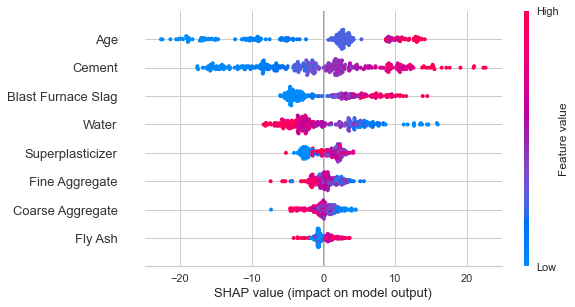

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [113]:
interpret_model(tune_cb);

In [119]:
predict_model(tune_cb);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2.9168,18.6553,4.3192,0.9263,0.1425,0.1011


In [121]:
final_cb = finalize_model(tune_cb)
print(final_cb)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=<catboost.core.CatBoostRegressor object at 0x0000000034402688>, ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Declaring custom model
INFO:logs:CatBoost Regressor Imported succesfully
INFO:logs:Checking ensemble method
INFO:logs:Initializing Fold 1
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:No inverse transformation
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 2
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:No inverse transformation
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 3
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:No inverse transformation
INFO:logs:C

In [122]:
predict_model(final_cb);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.2674,3.0115,1.7354,0.9881,0.0659,0.0466


In [124]:
save_model(final_cb,'Final CatBoost Model for Strength Prediction')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=<catboost.core.CatBoostRegressor object at 0x0000000036577508>, model_name=Final CatBoost Model for Strength Prediction, model_only=False, verbose=True)
INFO:logs:Final CatBoost Model for Strength Prediction.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=['Age'],
                                      target='Strength', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_...
    

Transformation Pipeline and Model Succesfully Saved
